In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import patches as mpatches

In [9]:
data = pd.read_csv('Mätdata SALSA 240623.csv', delimiter=',') #Läser in datan

data #Skriver ut data

,No.,Longitude,Velocity
0,1,20,110
1,2,25,95
2,3,30,90
3,4,35,85
4,5,40,60
5,6,45,60
6,7,50,50
7,8,55,40
8,9,60,25
9,10,65,15


In [10]:
data['Distance'] = np.sin(np.radians(data['Longitude'])) * 8100
data['Rotational Velocity'] = data['Velocity'] + 220 * np.sin(np.radians(data['Longitude']))

data #Skriver ut data

,No.,Longitude,Velocity,Distance,Rotational Velocity
0,1,20,110,2770.363161,185.244432
1,2,25,95,3423.207920,187.976018
2,3,30,90,4050.000000,200.000000
3,4,35,85,4645.969134,211.186816
4,5,40,60,5206.579638,201.413274
5,6,45,60,5727.564928,215.563492
6,7,50,50,6204.959989,218.529777
7,8,55,40,6635.131559,220.213450
8,9,60,25,7014.805771,215.525589
9,10,65,15,7341.093075,214.387713


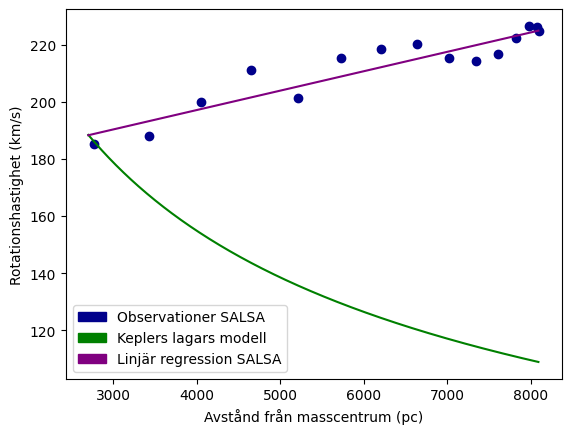

In [12]:
plt.scatter(data['Distance'], data['Rotational Velocity'], color='darkblue')#Plottar datan

plt.xlabel('Avstånd från masscentrum (pc)')
plt.ylabel('Rotationshastighet (km/s)')

x = range(2700,8100,10)
a = np.zeros(len(x))
for i in range(0, len(x)):
    a[i] = np.sqrt((4.3009172706 * 10**(-3) * 2.23* 10**10)/x[i])

plt.plot(x, a, color='green')

b = np.zeros(len(x))
for i in range(0, len(x)):
    b[i] = 6.8 * 10**(-3) * x[i] + 170
    
plt.plot(x, b, color='purple')

darkblue_patch = mpatches.Patch(color = 'darkblue', label = 'Observationer SALSA')
green_patch = mpatches.Patch(color = 'green', label = 'Keplers lagars modell')
purple_patch = mpatches.Patch(color = 'purple', label = 'Linjär regression SALSA')
plt.legend(handles = [darkblue_patch, green_patch, purple_patch])

plt.savefig('Resultat v.png')